In [4]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.model_selection import validation_curve
import datetime

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#import graphviz 
import timeit
import os
from IPython.display import Image

In [5]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationalnum','marital-status', 'occupation', 'relationship', 'race', 'gender','capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry','income']

train = pd.read_csv('adult.csv', header=None, names = columns)
test = pd.read_csv('adult_test.csv',  header=None, names = columns)

adult = pd.concat([train,test])

len(adult)

48842

In [6]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalnum',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')

In [7]:
adult['nativecountry'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [8]:
print("Before dropping size = " , len(adult))

adult = adult[adult.occupation.str.strip() != '?']
adult = adult[adult.workclass.str.strip() != '?']
adult = adult[adult.nativecountry.str.strip() != '?']

print("After removing rows with value ?" , len(adult))


Before dropping size =  48842
After removing rows with value ? 45222


In [9]:
def func(x):
    if(x == " <=50K" or x == " <=50K."):
        return 0
    elif(x == " >50K" or x == ' >50K.'):
        return 1
adult['income'] = adult['income'].apply(func)

y = adult['income']
del adult['income']

In [10]:
adult.head()

,age,workclass,fnlwgt,education,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


#### Education and educationnum both represent the level of education. So we can remove one of them.
#### fnlwgt – The number of people the census takers believe that observation represents. Remove this variable.

In [11]:
del adult['education']
del adult['fnlwgt']

In [12]:
adult.head()

,age,workclass,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [13]:
adult = pd.get_dummies(adult, columns=['workclass','marital-status','occupation',
                                         'relationship','race',
                                         'gender','nativecountry'])

In [14]:

# Train - Test split# Train  
X_train, X_test, y_train, y_test = train_test_split(adult, y, test_size  = 0.3, random_state = 55)

print("Training dataset size: ", len(X_train))
print("Testing dataset size: ", len(X_test))
print("Training label dataset size: ", len(y_train))
print("Testing label dataset size: ", len(y_test))

Training dataset size:  31655
Testing dataset size:  13567
Training label dataset size:  31655
Testing label dataset size:  13567


### Check for hyper parameters using max_depth

In [15]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [16]:

np.random.seed(55)
mlp = MLPClassifier()

hidden_layer_sizes = [5,10,15,(15,15), 20, 40, (40,40), 50, 100]


train_scores, test_scores = validation_curve( mlp, X_train, y_train, param_name="hidden_layer_sizes", param_range=hidden_layer_sizes,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)






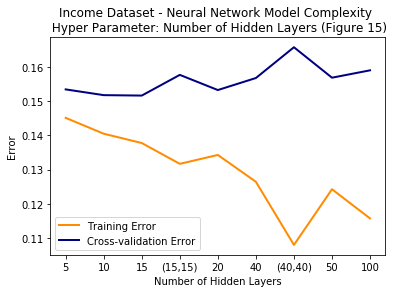

train_scores = [0.85492813 0.85954826 0.86226507 0.86833045 0.86574002 0.87356657
 0.89196808 0.87573843 0.88424419]
test_scores = [0.84662779 0.8483023  0.84842861 0.8423947  0.84681736 0.84331085
 0.8343388  0.84321611 0.84106811]
Optimal max depth =  15  Minimum Error =   0.15157138864901687


In [17]:
hidden_layer_params = ['5','10','15', '(15,15)', '20', '40', '(40,40)', '50', '100']
plt.title("Income Dataset - Neural Network Model Complexity \n Hyper Parameter: Number of Hidden Layers (Figure 15)")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Error")


lw = 2
plt.plot(np.arange(1,10), 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(np.arange(1,10), 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.xticks(np.arange(1,10), hidden_layer_params)

plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal max depth = ",  hidden_layer_sizes[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )



### Choose optimal activation parameter


In [18]:

np.random.seed(55)
mlp = MLPClassifier(hidden_layer_sizes = (20,))

activation_param = ['logistic', 'tanh', 'relu']


train_scores, test_scores = validation_curve( mlp, X_train, y_train, param_name="activation", param_range=activation_param,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



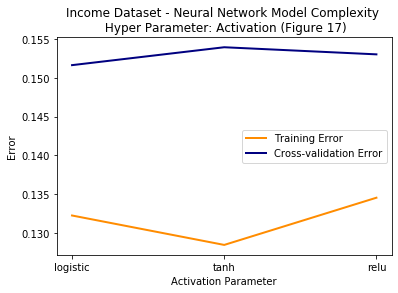

train_scores = [0.86773812 0.871529   0.86544779]
test_scores = [0.84836544 0.84605937 0.84697535]
Optimal param =  logistic  Minimum Error =   0.15163455981457885


In [19]:
plt.title("Income Dataset - Neural Network Model Complexity \n Hyper Parameter: Activation (Figure 17)")
plt.xlabel("Activation Parameter")
plt.ylabel("Error")


lw = 2
plt.plot(activation_param, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(activation_param, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
#print("Optimal max depth = ",  estimators[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )
print("Optimal param = ",  activation_param[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )




In [20]:
np.random.seed(55)
mlp = MLPClassifier(hidden_layer_sizes = (20,), activation = "relu")

solver_param = ['lbfgs', 'sgd', 'adam']

train_scores, test_scores = validation_curve( mlp, X_train, y_train, param_name="solver", param_range=solver_param,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


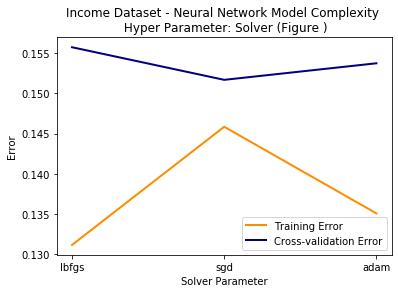

train_scores = [0.8688122  0.85415418 0.86490285]
test_scores = [0.84429035 0.84833385 0.84628052]
Optimal param =  sgd  Minimum Error =   0.15166614541785184


In [21]:
plt.title("Income Dataset - Neural Network Model Complexity \n Hyper Parameter: Solver (Figure )")
plt.xlabel("Solver Parameter")
plt.ylabel("Error")


lw = 2
plt.plot(solver_param, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(solver_param, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
#print("Optimal max depth = ",  estimators[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )
print("Optimal param = ",  solver_param[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )




### Create learning curve - Sample data set size vs. Error

In [22]:
np.random.seed(55)
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

'''
#Create timings for Cross validation Set on Adult Income dataset
mlp = MLPClassifier(hidden_layer_sizes = (5, 5, 5, 5, 5), activation = "logistic", solver = "adam", learning_rate_init=0.05,
              max_iter=200)
train_sizes = np.zeros(10)
'''
nn_classifier = MLPClassifier(solver='adam',activation='relu', hidden_layer_sizes=(20,), learning_rate_init = 0.001)
train_sizes, train_scores, validation_scores = learning_curve(
    nn_classifier, X_train, y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = 5)
'''
i=0
cv_scores=np.zeros(10)
train_scores=np.zeros(10)
    
for sub in training_sizes:
    msk = np.random.rand(len(X_train)) < sub
    smaller_X_train = X_train[msk]
    smaller_y_train = y_train[msk]
    train_sizes[i] = len(smaller_X_train)
    #print("i = " , i)
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    scores = cross_val_score(mlp , sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    cv_scores[i] = np.mean(scores)
    mlp.fit(sub_X_train, sub_y_train)
    train_scores[i] = mlp.score(sub_X_train, sub_y_train)
    i = i + 1

'''

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

'\ni=0\ncv_scores=np.zeros(10)\ntrain_scores=np.zeros(10)\n    \nfor sub in training_sizes:\n    msk = np.random.rand(len(X_train)) < sub\n    smaller_X_train = X_train[msk]\n    smaller_y_train = y_train[msk]\n    train_sizes[i] = len(smaller_X_train)\n    #print("i = " , i)\n    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, \n                                                                            test_size=0.3)\n    scores = cross_val_score(mlp , sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))\n    cv_scores[i] = np.mean(scores)\n    mlp.fit(sub_X_train, sub_y_train)\n    train_scores[i] = mlp.score(sub_X_train, sub_y_train)\n    i = i + 1\n\n'

In [23]:
print(train_scores)
print(validation_scores)

[[0.87598736 0.88546603 0.88704581 0.88704581 0.88941548]
 [0.88388626 0.88151659 0.89060032 0.89139021 0.89533965]
 [0.88335966 0.89283834 0.8883623  0.88546603 0.88967878]
 [0.87815956 0.88250395 0.88487362 0.88250395 0.87954186]
 [0.8764613  0.87661927 0.87835703 0.87077409 0.87867299]
 [0.8771722  0.87796209 0.87585571 0.87677725 0.87638231]
 [0.8781451  0.87509873 0.87295498 0.87295498 0.86934447]
 [0.87145819 0.87520979 0.87205055 0.87333399 0.87205055]
 [0.87327775 0.87345327 0.87055726 0.8681878  0.86766125]
 [0.8689677  0.8748914  0.87046837 0.86833583 0.86967854]
 [0.86788253 0.87046744 0.86737991 0.86730811 0.87097006]
 [0.87356019 0.87178306 0.86928191 0.86783387 0.86809715]
 [0.86554469 0.86967617 0.86748891 0.8669421  0.86627377]
 [0.86844184 0.86883674 0.86488774 0.86759562 0.86748279]
 [0.86573294 0.86857624 0.86499579 0.86583825 0.86789174]
 [0.86671932 0.8679534  0.8664725  0.86691677 0.86657123]
 [0.86289723 0.86577774 0.86424456 0.86703215 0.86517376]
 [0.86467749 0

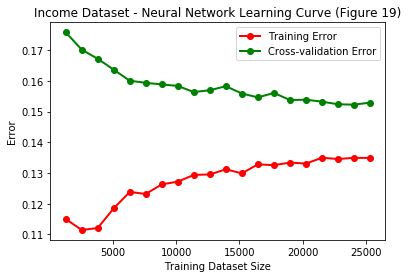

In [24]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Income Dataset - Neural Network Learning Curve (Figure 19)")
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")


lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")

plt.show()





In [25]:
print (1)

1



train_scores = [0.89628752 0.88609795 0.87922591 0.87592062 0.87410157 0.87003225
 0.86951371 0.86656136 0.86583589 0.86516605]
test_scores = [0.83108536 0.8374352  0.83813008 0.8407521  0.8415103  0.84403755
 0.84489057 0.84602756 0.84552243 0.84694395]
train sizes = [ 2532  5064  7596 10129 12661 15193 17726 20258 22790 25323]


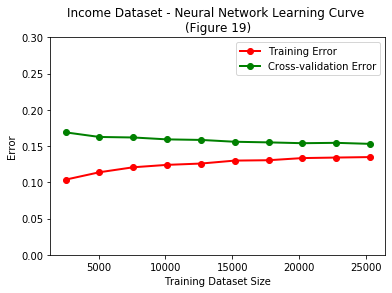

In [26]:
np.random.seed(55)
estimator = MLPClassifier(hidden_layer_sizes = (20,), activation = "relu", solver = "adam", learning_rate_init=0.001)
st_train_time = timeit.default_timer() 
estimator.fit(X_train, y_train)
end_train_time = timeit.default_timer()

title = "Income Dataset - Neural Network Learning Curve \n(Figure 19)"
ylim=(0.0, 0.3)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
#cv = StratifiedKFold(y_train, n_folds=10)
#plot_learning_curve(estimator, title, X_train, y_train, , cv=cv, n_jobs=4)



plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train, y_train, cv=5, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10), shuffle = True)



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)

plt.show()

### Predict on Testing set

In [27]:
st_train_time = timeit.default_timer() 
nn_classifier.fit(X_train, y_train)
end_train_time = timeit.default_timer()


st_pred_time = timeit.default_timer() 
y_pred = nn_classifier.predict(X_test)
end_pred_time = timeit.default_timer() 

pred_time = end_pred_time - st_pred_time

print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))
print("AUC =", roc_auc_score(y_test, y_pred))
print("Prediction Time = ", pred_time)
print("Training Time = ", end_train_time - st_train_time)


Accuracy: 84.81609788457286%
[[9344  811]
 [1249 2163]]
              precision    recall  f1-score   support

           y       0.88      0.92      0.90     10155
           n       0.73      0.63      0.68      3412

    accuracy                           0.85     13567
   macro avg       0.80      0.78      0.79     13567
weighted avg       0.84      0.85      0.84     13567

AUC = 0.777038450904301
Prediction Time =  0.01055379999888828
Training Time =  18.957577399996808


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
estimator.n_features_